In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

from pathlib import Path
import glob
import sys, os

In [7]:
CUR_DIR = Path.cwd()
DATA_DIR = CUR_DIR / 'data/additional'
DATA_DIR

WindowsPath('C:/Users/안현준/풍년보험/data/additional')

In [25]:
files = []
crops = []
for filename in glob.glob(os.path.join(DATA_DIR, '*.xlsx')):
    cur_file_path = os.path.join(os.getcwd(), filename)
    files.append(cur_file_path)
    crop = cur_file_path.split('\\')[-1].split('.')[0]
    crops.append(crop)

In [37]:
data = {}
for i, file in enumerate(files):
    df = pd.read_excel(file)
    # 거래량(톤) 숫자 형태로 변환 (1,000 -> 1000)
    try:
        df['거래량(톤)'] = df['거래량(톤)'].str.replace(',', '')
    except:
        pass
    df['거래량(톤)'] = df['거래량(톤)'].astype(float)
    
    data[crops[i]] = df
    print(df)
    print()

        년월   거래량(톤)   도매가격(원/kg)
0    14. 1   5977.0   726.347981
1    14. 2   5672.0   642.354749
2    14. 3   8347.0   762.886563
3    14. 4   7900.0  1063.560829
4    14. 5  12598.0  1097.752937
..     ...      ...          ...
90   21. 7  10981.0   771.819471
91   21. 8  11262.0  1106.662608
92   21. 9   8109.0  1142.886512
93  21. 10   9851.0  1080.150035
94  21. 11   2311.0  1060.620518

[95 rows x 3 columns]

        년월   거래량(톤)   도매가격(원/kg)
0    14. 1   3452.0  1230.918340
1    14. 2   2911.0  1317.258578
2    14. 3   3598.0  1330.713757
3    14. 4   2197.0  1448.809809
4    14. 5   2098.0  1884.640414
..     ...      ...          ...
90   21. 7   4627.0  2283.427500
91   21. 8   9586.0  2287.130851
92   21. 9   9446.0  2001.652584
93  21. 10  10323.0  1637.053013
94  21. 11   2163.0  1421.555423

[95 rows x 3 columns]

        년월  거래량(톤)    도매가격(원/kg)
0    14. 1   799.0   6964.702987
1    14. 2   842.0   4606.969896
2    14. 3  1164.0   5140.348297
3    14. 4  1123.0   4573.20

        년월  거래량(톤)   도매가격(원/kg)
0    14. 1  1358.0  3625.682366
1    14. 2  1748.0  4207.747404
2    14. 3  3279.0  3433.865131
3    14. 4  4283.0  3263.506666
4    14. 5  6977.0  1845.251877
..     ...     ...          ...
90   21. 7  7828.0  1637.600819
91   21. 8  8609.0  1655.038820
92   21. 9  5372.0  2031.836409
93  21. 10  5076.0  2431.541909
94  21. 11   962.0  3011.407554

[95 rows x 3 columns]

        년월  거래량(톤)   도매가격(원/kg)
0    14. 3   0.030  5500.000000
1    14. 7   0.005  4000.000000
2    14. 8   0.003  3066.666667
3    14. 9   1.000  2123.476523
4   14. 10   1.000  2105.026690
..     ...     ...          ...
68   21. 7   0.020  2571.428571
69   21. 8   0.060  7158.730159
70   21. 9   2.000  3755.252101
71  21. 10   6.000  3823.771166
72  21. 11   0.900  9284.068891

[73 rows x 3 columns]

        년월   거래량(톤)   도매가격(원/kg)
0    14. 1    447.0  4313.694266
1    14. 2    532.0  4536.556705
2    14. 3   1539.0  4590.160204
3    14. 4   2808.0  3632.011297
4    14. 5   2123.0

In [39]:
data.keys()

dict_keys(['감자', '고구마', '깻잎', '녹두', '단감', '당근', '대파', '들깨', '딸기', '무', '미나리', '방울토마토', '배', '배추', '복숭아', '사과', '생강', '수박', '시금치', '양배추', '양파', '오이', '참깨', '참외', '콩', '토마토', '팥', '포도', '풋고추'])

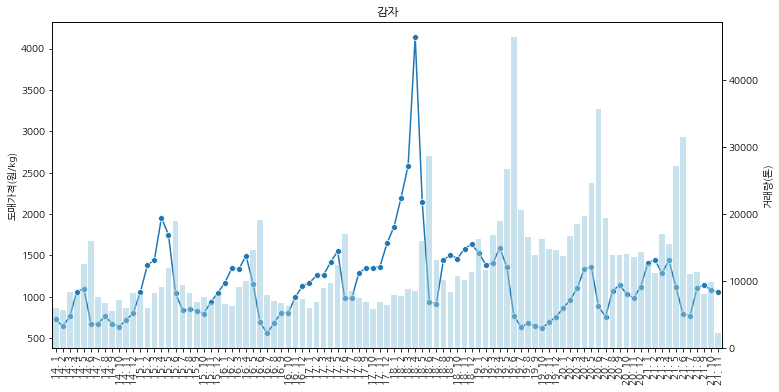

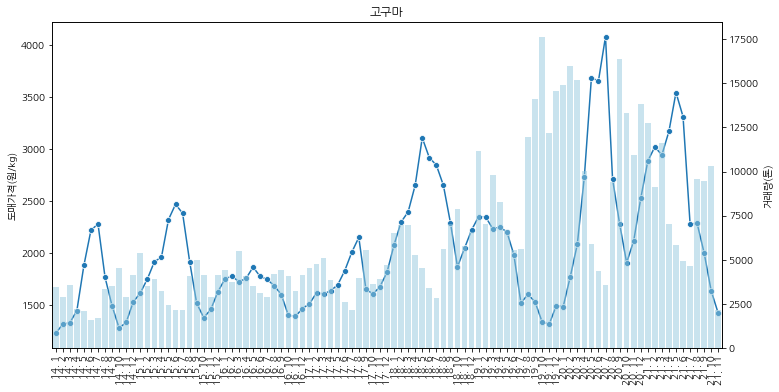

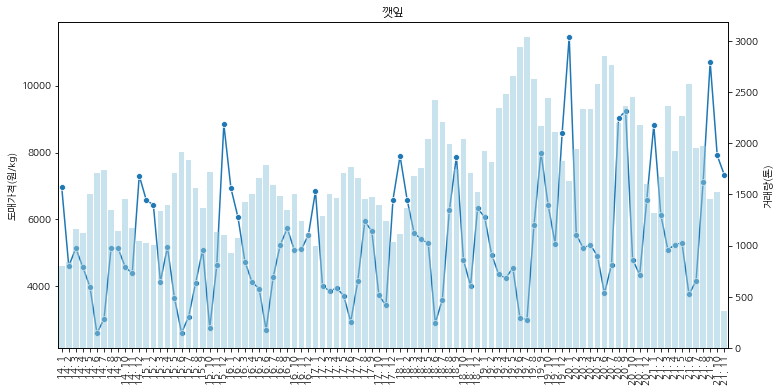

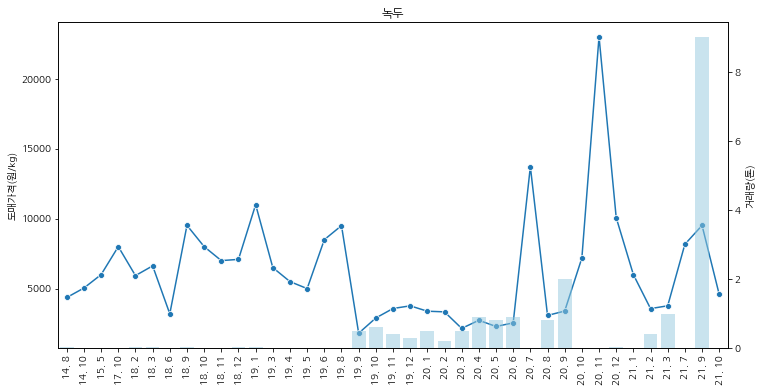

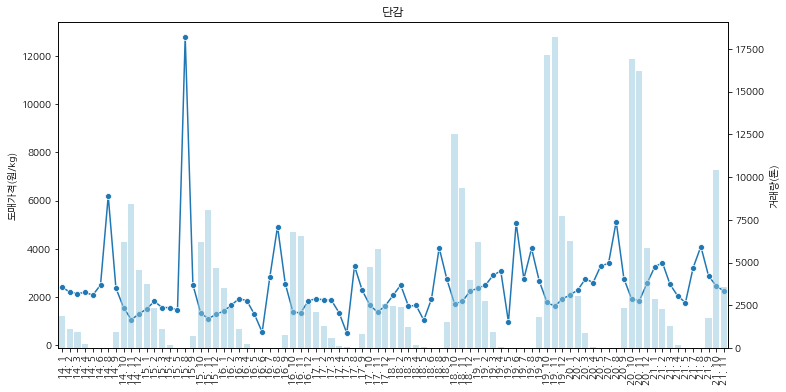

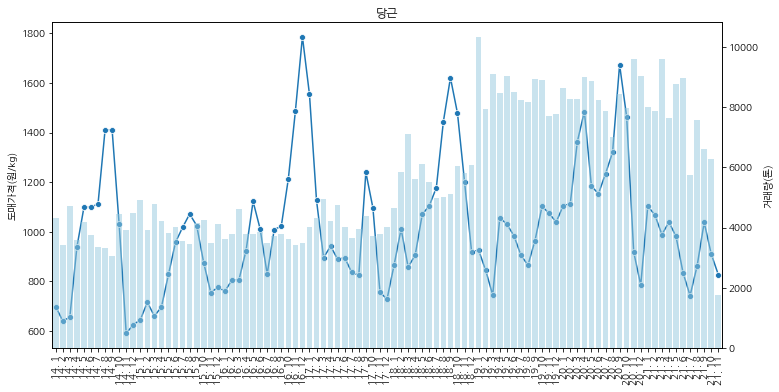

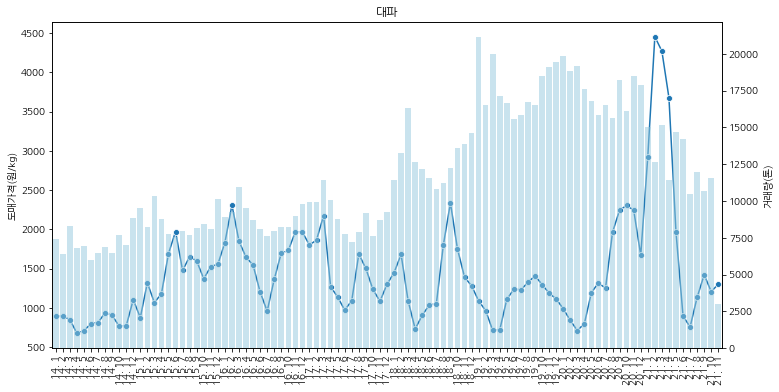

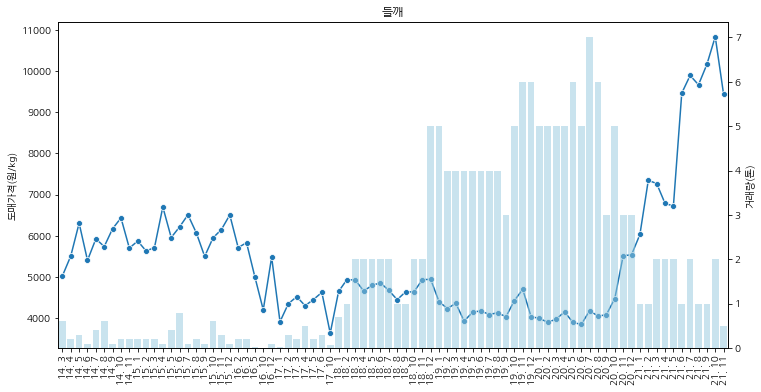

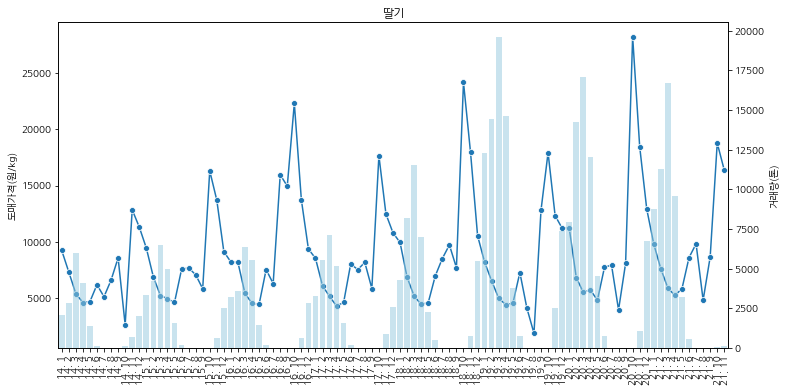

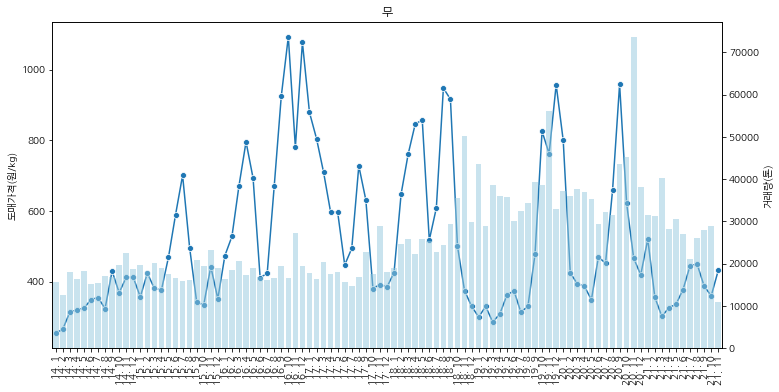

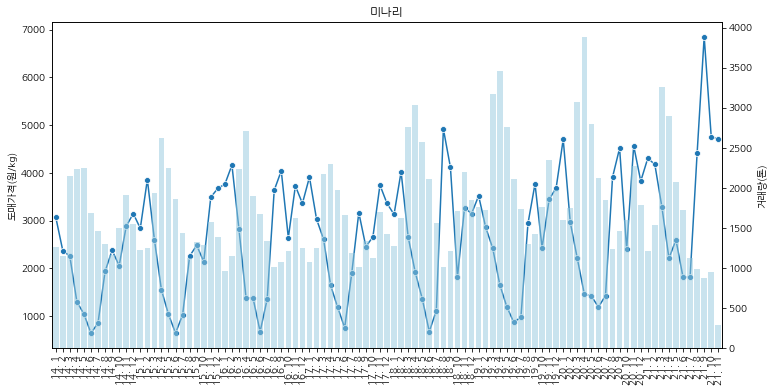

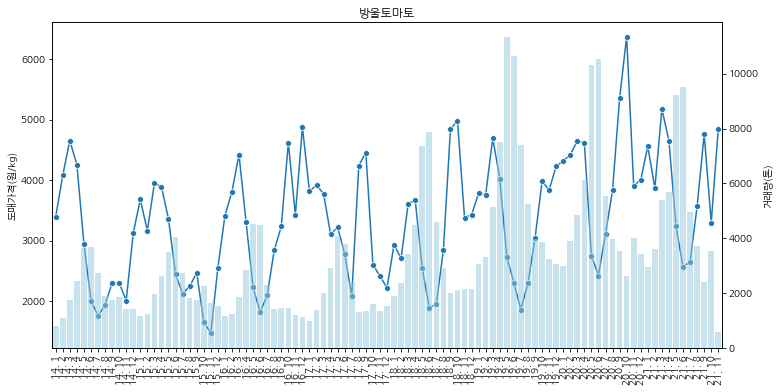

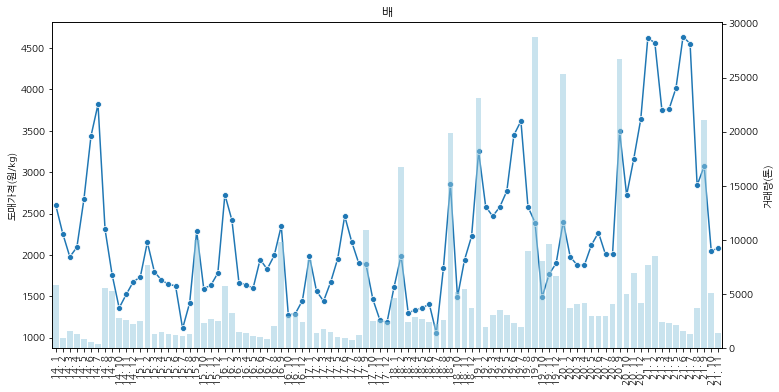

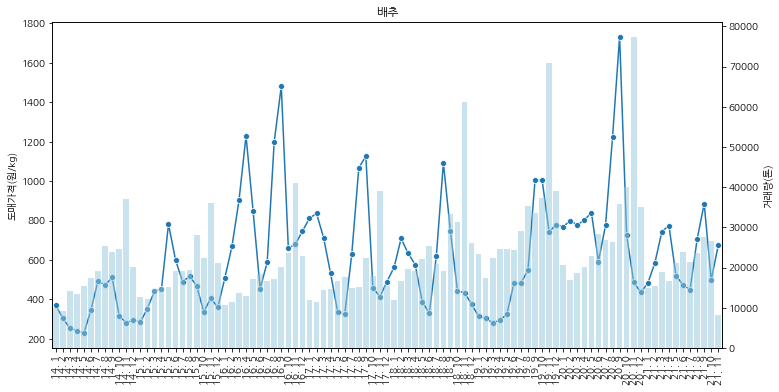

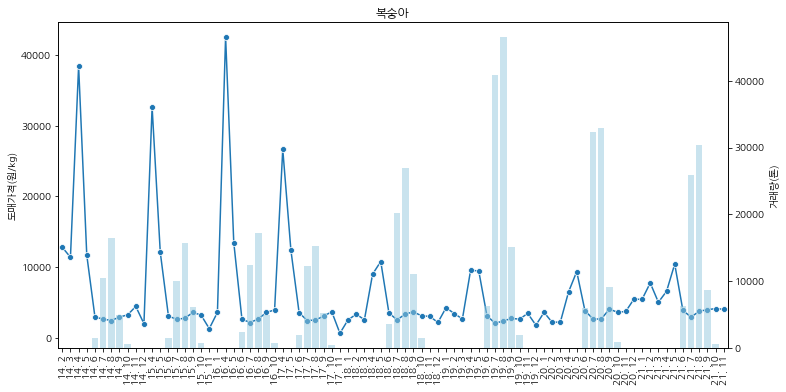

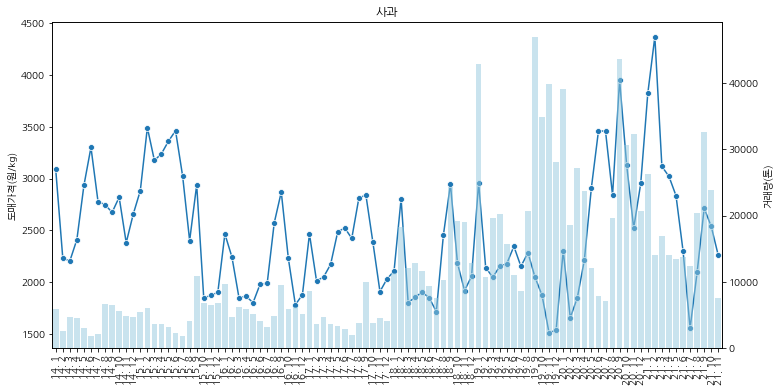

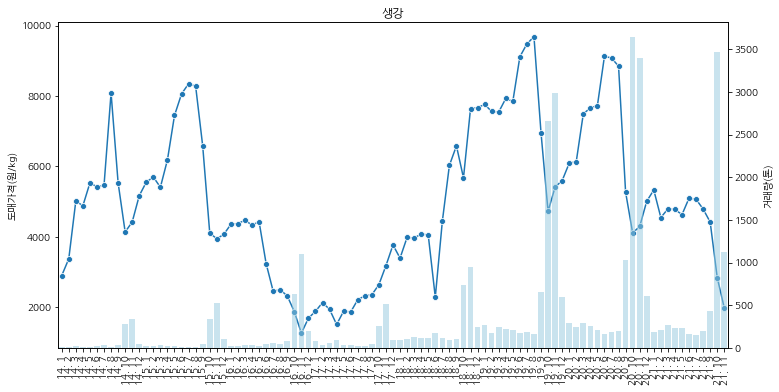

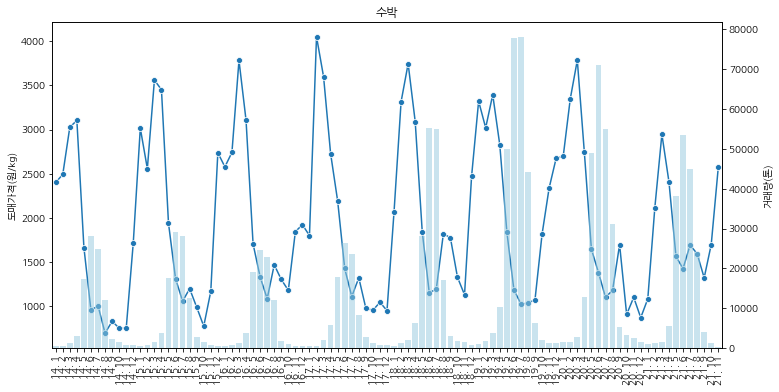

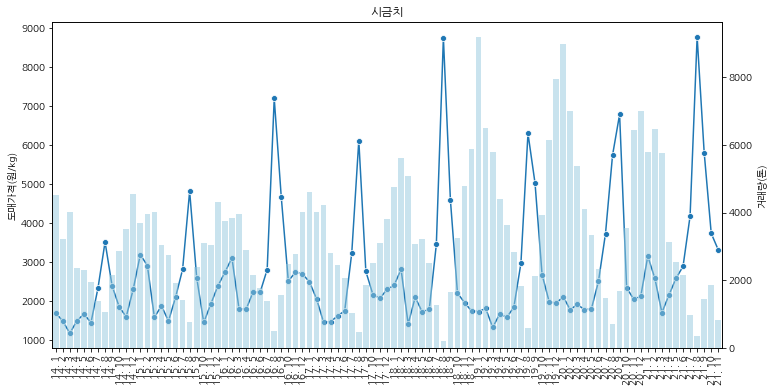

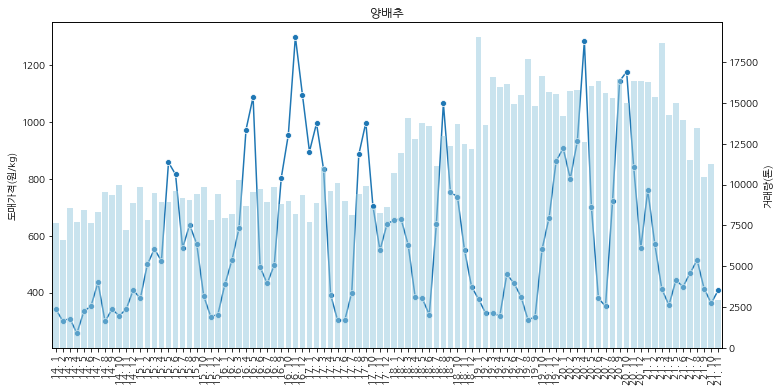

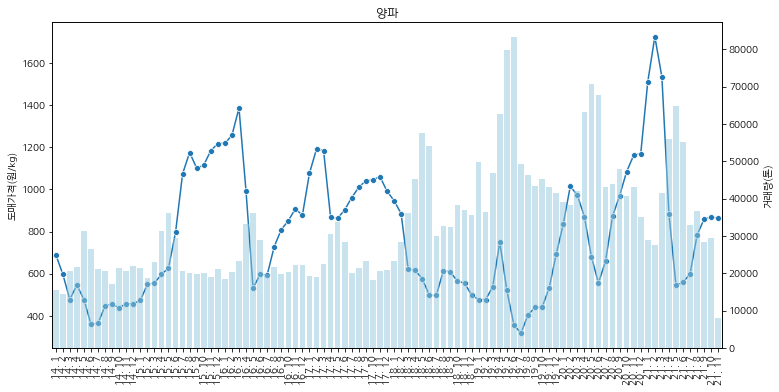

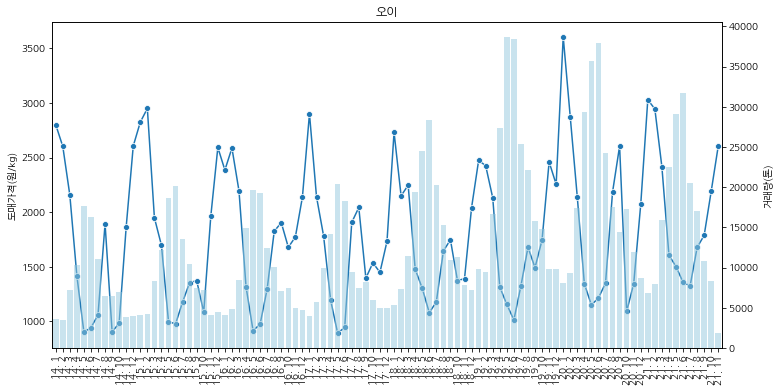

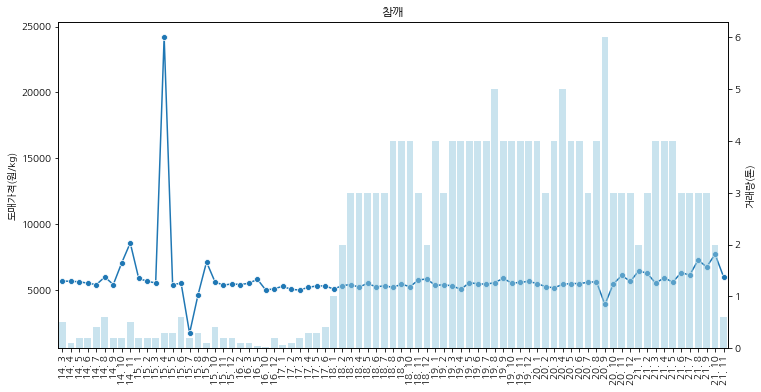

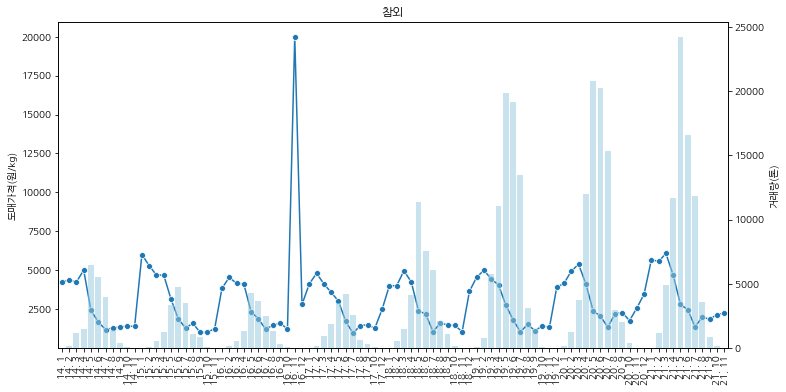

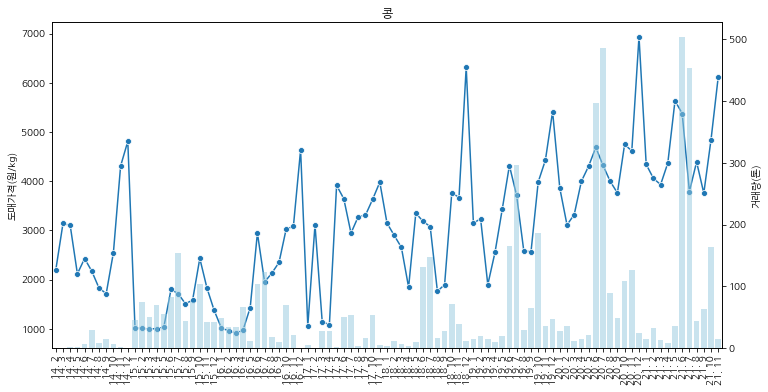

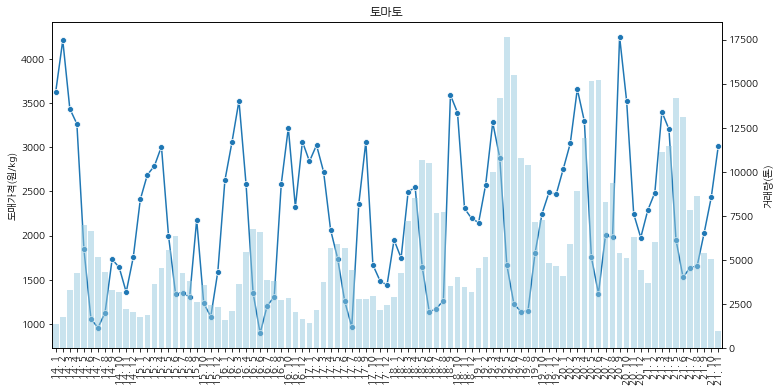

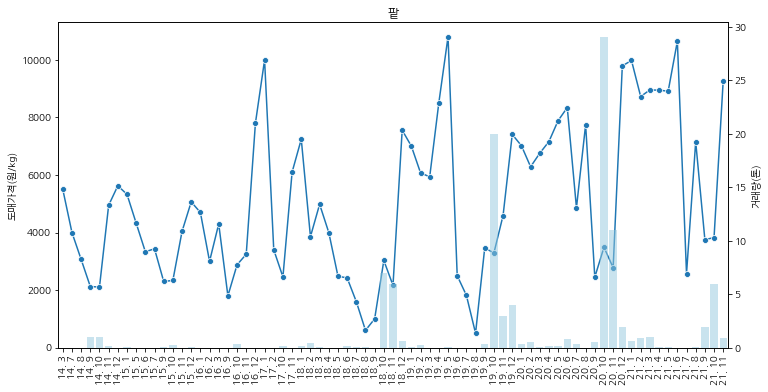

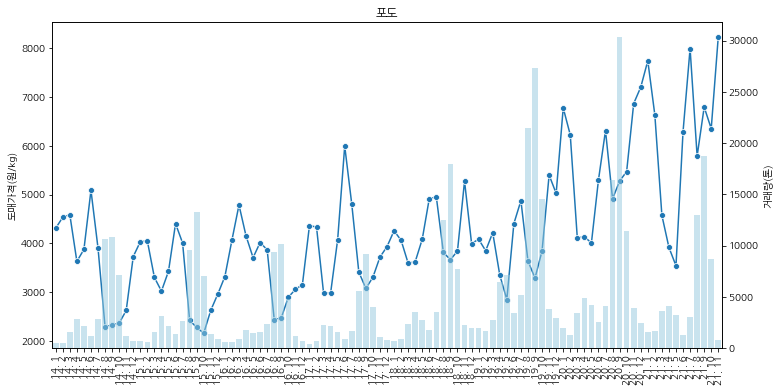

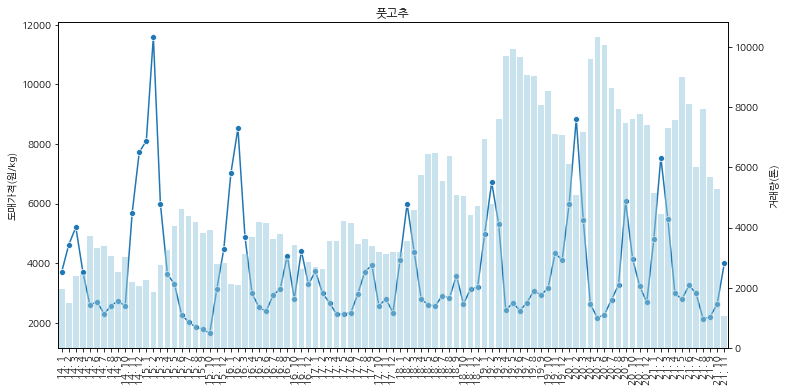

In [47]:
for crop in data.keys():
    df = data[crop]
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    sns.lineplot(data = df['도매가격(원/kg)'], marker='o', sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = df, x='년월', y='거래량(톤)', color='skyblue', alpha=0.5, ax=ax2)
    
    ax1.set_title(crop)
    ax1.set_xticklabels(df['년월'], rotation=90)
    
    plt.show()


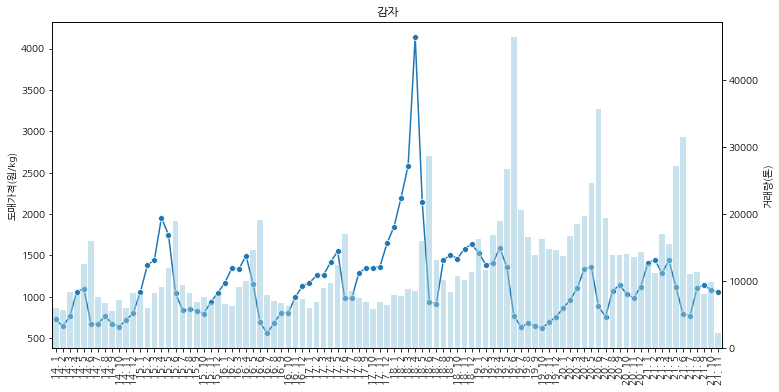

In [53]:
df = data['감자']



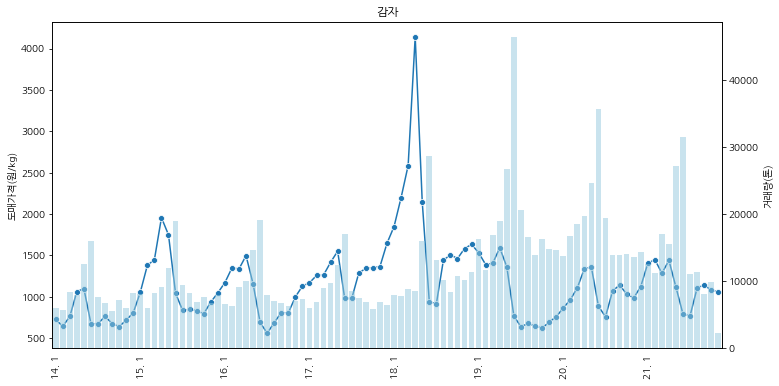

In [73]:
def convert(x):
    if x[-1] == '1' and x[-2:] != '11':
        return x
    return ''

df = data['감자']
df['t'] = df['년월'].apply(lambda x: convert(str(x)))

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df['도매가격(원/kg)'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df, x='년월', y='거래량(톤)', color='skyblue', alpha=0.5, ax=ax2)

ax1.set_title('감자')
ax1.set_xticklabels(df['t'], rotation=90)
ax1.xaxis.set_ticks_position('none') 

plt.savefig(f'{DATA_DIR}/거래량.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error

def get_MSE(crop_name):
    DATA_DIR = str(CUR_DIR)
    df = pd.read_csv(f'{DATA_DIR}/results/{crop_name}/predicts_{crop_name}.csv')

    mse = mean_squared_error(df[f'{crop_name}_true'], df[f'{crop_name}_pred'])
    return mse

In [81]:
get_MSE('고구마')

10367897.195135543

In [82]:
get_MSE('양파')

8179290.290185038

In [89]:
mean_squared_error([1, 2, 3], [0, 0, 0])

4.666666666666667

In [95]:
crop_name = '고구마'
df = pd.read_csv(f'{DATA_DIR}/results/{crop_name}/predicts_{crop_name}.csv')
df

,연월,고구마_true,고구마_pred
0,2001_7,14020.999,15483.876
1,2001_8,18981.000,16038.139
2,2001_9,12415.000,22134.432
3,2001_10,9776.000,11014.161
4,2001_11,9511.000,11185.548
...,...,...,...
229,2020_8,61062.996,46964.390
230,2020_9,55765.004,50102.406
231,2020_10,38834.000,40768.047
232,2020_11,33565.000,30849.771


In [99]:
df1 = df.iloc[:198]
df1

,연월,고구마_true,고구마_pred
0,2001_7,14020.999,15483.876
1,2001_8,18981.000,16038.139
2,2001_9,12415.000,22134.432
3,2001_10,9776.000,11014.161
4,2001_11,9511.000,11185.548
...,...,...,...
193,2017_8,33410.000,28446.172
194,2017_9,33627.000,35878.383
195,2017_10,29114.000,31440.068
196,2017_11,24550.000,27068.777


In [100]:
mean_squared_error(df1['고구마_true'], df1['고구마_pred'])

7960735.763315314

In [103]:

def mean_absolute_percentage_error(y_true, y_pred): 


    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(df1['고구마_true'], df1['고구마_pred'])

9.044399591654201